In [17]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
data=pd.read_csv(r"D:\Machine_learning_Projects\Titanic\titanic\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<bound method Axes.barh of <AxesSubplot:>>

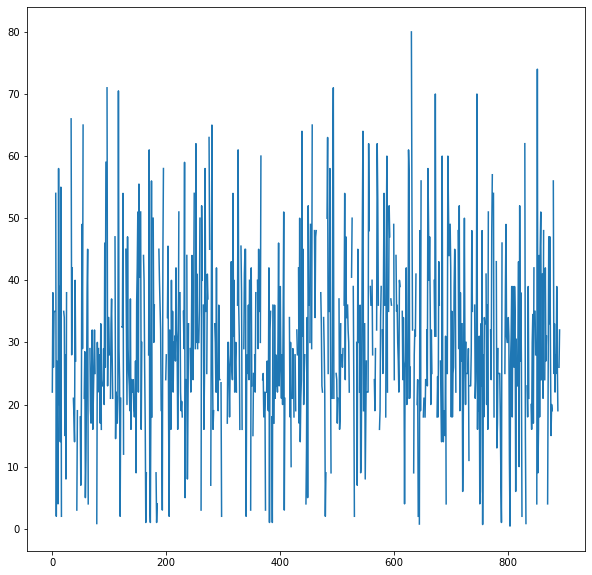

In [16]:
plt.rc('figure', figsize=(10, 10))
data['Age'].plot().barh

<AxesSubplot:xlabel='Age', ylabel='Sex'>

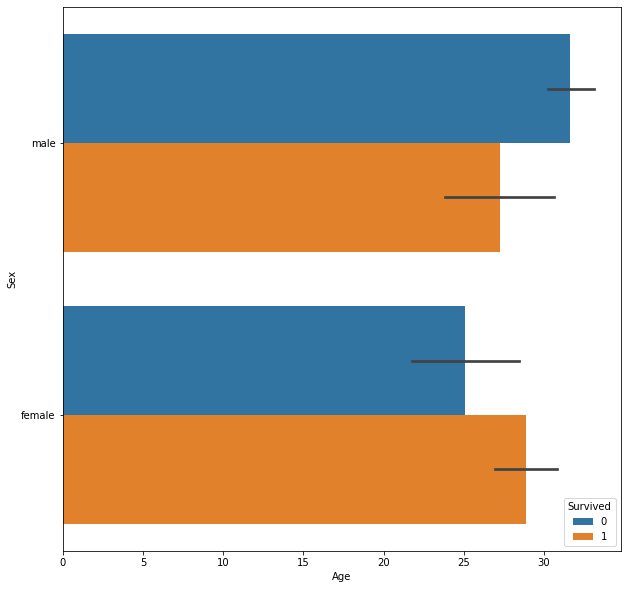

In [24]:
sns.barplot(x='Age',y='Sex',data=data,hue='Survived')

<AxesSubplot:ylabel='Frequency'>

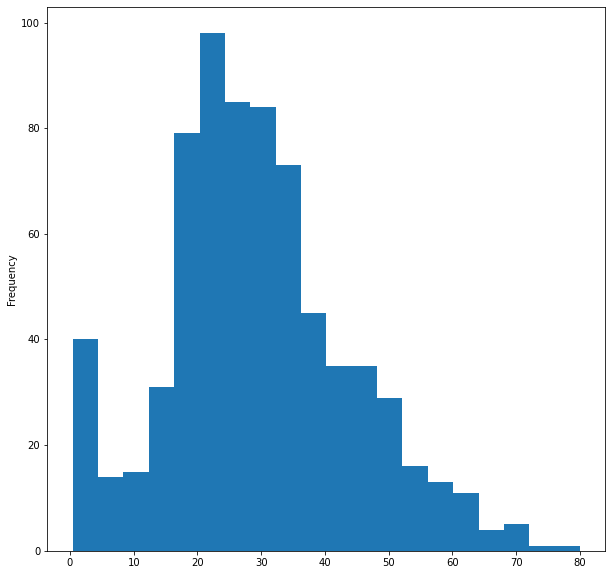

In [25]:
data['Age'].plot.hist(bins=20)

<AxesSubplot:ylabel='Density'>

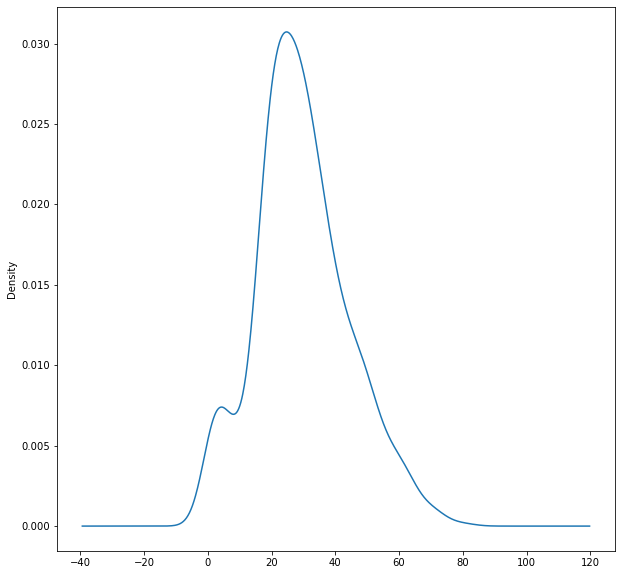

In [32]:
data['Age'].plot.density()

C:\Users\Dell\miniconda3\envs\KV7006\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

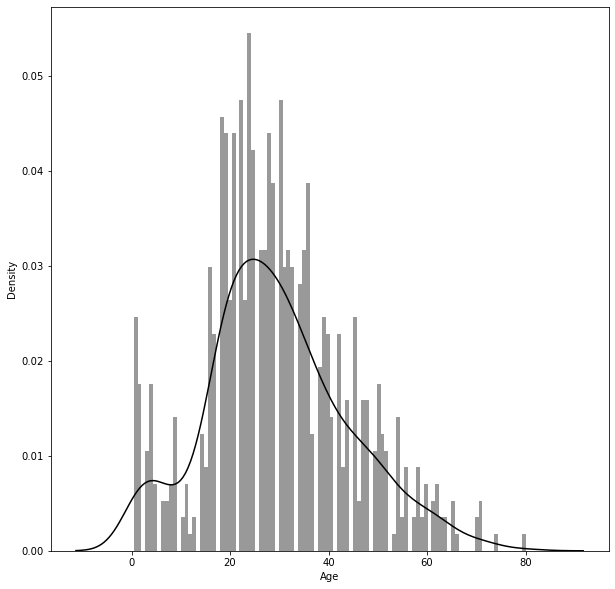

In [52]:
sns.distplot(data['Age'],bins=100,color='k')

In [179]:
data['Age'].fillna((data['Age'].mean()),inplace=True)

In [180]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
data['Cabin'].mode()
data['Embarked'].mode()

0    S
dtype: object

In [181]:
data['Cabin'].fillna(data['Cabin'].mode()[1],inplace=True)

In [182]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [183]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

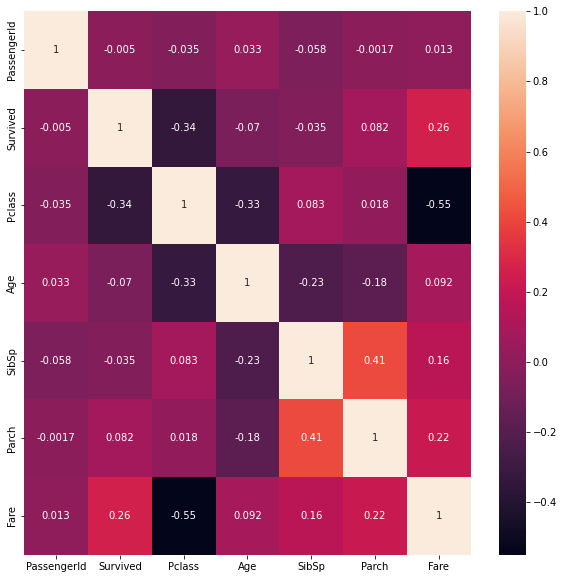

In [184]:
cor=data.corr()
sns.heatmap(cor,annot=True)

<AxesSubplot:>

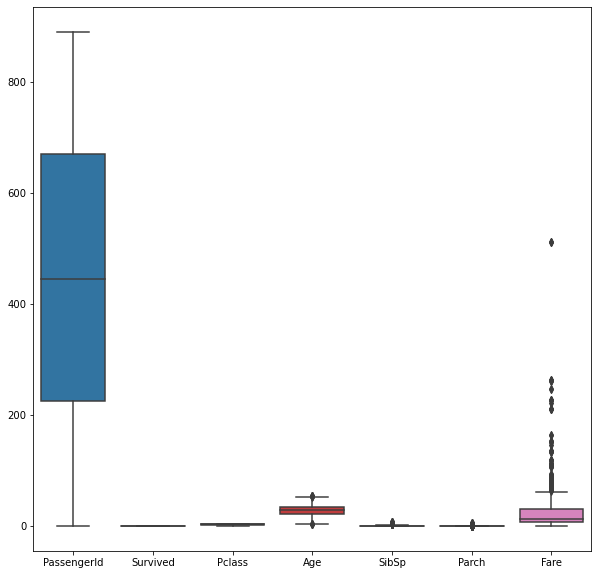

In [152]:
sns.boxplot(data=data)

<AxesSubplot:xlabel='Age'>

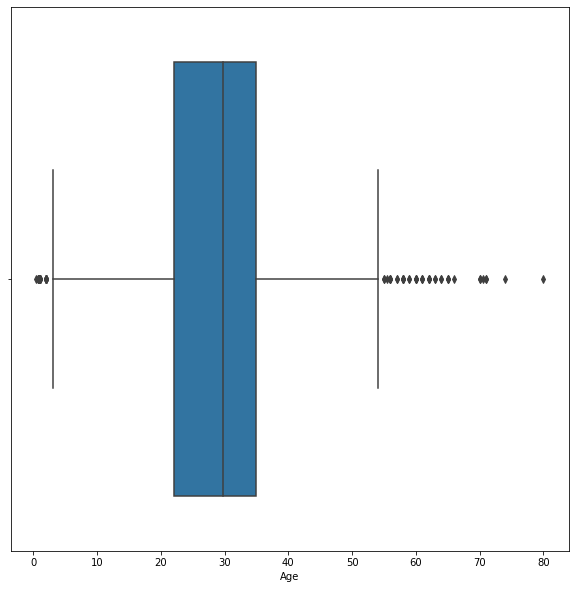

In [144]:
sns.boxplot(x='Age',data=data)

In [185]:
# Removing Outliers

Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR= Q3 - Q1
print('IQR',IQR)
print('Old shape',data.shape)
upper=np.where(data['Age'] >= (Q3 + 1.5 * IQR))
lower = np.where(data['Age'] <= (Q1 - 1.5 * IQR))
print(upper)
print(lower)

data.drop(upper[0],inplace=True)
data.drop(lower[0],inplace=True)

print('New Shape',data.shape)

IQR 13.0
Old shape (891, 12)
(array([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
       268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
       555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
       829, 851, 879], dtype=int64),)
(array([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
       469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831], dtype=int64),)
New Shape (825, 12)


<AxesSubplot:xlabel='Age'>

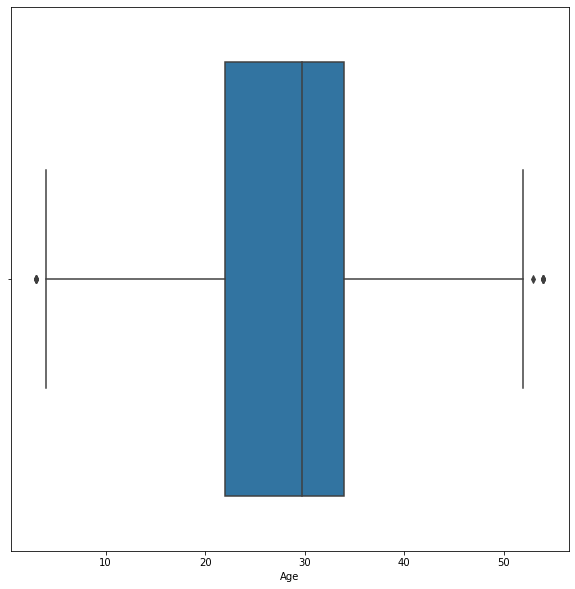

In [171]:
sns.boxplot(x='Age',data=data)

<AxesSubplot:xlabel='Fare'>

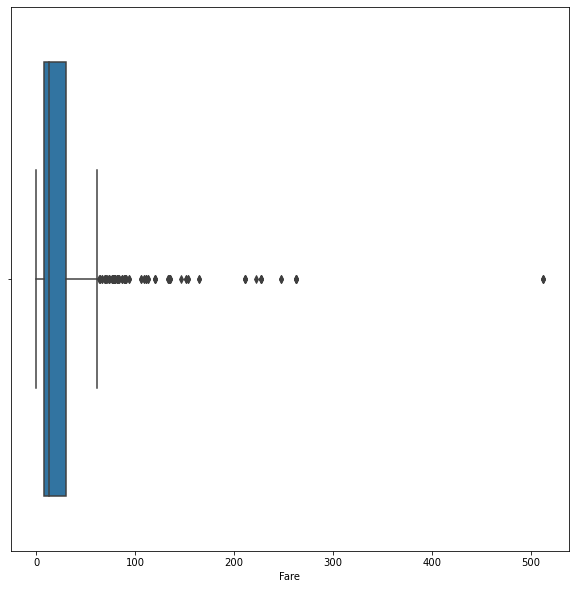

In [187]:
sns.boxplot(x='Fare',data=data)

In [186]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75, interpolation='midpoint')

IQR = Q3 - Q1

print('IQR',IQR)

data.shape

upper = np.where(data['Fare'] >= (Q3 + 1.5 * IQR))
lower = np.where(data['Fare'] <= (Q1 - 1.5 * IQR))

print(upper)
print(lower)
#data.drop(upper[0],axis=1, inplace=True)
data.drop(lower[0],axis=1, inplace=True)

print('New SHape',data.shape)


IQR 22.174999999999997
(array([  1,  23,  27,  29,  47,  55,  56,  66,  81,  88,  93, 108, 109,
       113, 128, 140, 147, 164, 183, 196, 199, 205, 211, 225, 235, 236,
       237, 241, 247, 266, 267, 274, 280, 281, 284, 285, 292, 293, 298,
       299, 305, 307, 309, 310, 313, 340, 344, 346, 348, 351, 355, 359,
       362, 381, 404, 413, 421, 447, 449, 456, 458, 464, 465, 480, 487,
       496, 499, 503, 508, 514, 515, 537, 541, 546, 564, 570, 580, 593,
       595, 604, 608, 613, 626, 628, 635, 643, 645, 653, 661, 675, 682,
       686, 687, 698, 702, 706, 708, 721, 730, 733, 743, 760, 771, 782,
       785, 791, 798], dtype=int64),)
(array([], dtype=int64),)
New SHape (825, 12)


<AxesSubplot:xlabel='Fare'>

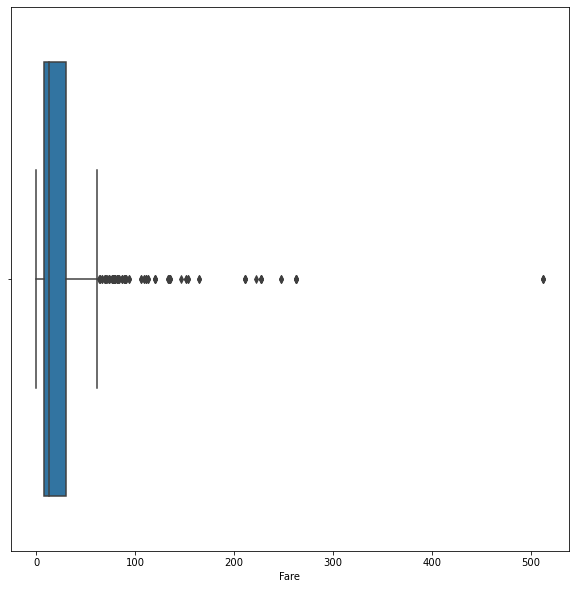

In [188]:
sns.boxplot(x='Fare',data=data)

In [210]:
target=data.Survived
data.drop('Survived',axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,C23 C25 C27,S
887,888,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,C23 C25 C27,S
889,890,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


In [215]:
data.drop(['Name','Ticket','Cabin'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,S
1,2,1,1,0,38.000000,1,0,71.2833,C
2,3,1,3,0,26.000000,0,0,7.9250,S
3,4,1,1,0,35.000000,1,0,53.1000,S
4,5,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,S
887,888,1,1,0,19.000000,0,0,30.0000,S
888,889,0,3,0,29.699118,1,2,23.4500,S
889,890,1,1,1,26.000000,0,0,30.0000,C


In [212]:
gender=data['Sex']
gender.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [213]:
gender=gender.replace({'male' : 1,'female' :0})
gender

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 825, dtype: int64

In [218]:
data['Sex']=gender
data.drop(['Name','Ticket','Cabin'],axis=1, inplace=True)

data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [236]:
data[['C','Q','S']]=pd.get_dummies(data['Embarked'])

In [239]:
data.drop('Embarked',axis=1,inplace=True)

In [240]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [242]:
target=data['Survived']
data.drop('Survived',axis=1,inplace=True)
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0
2,3,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,1
4,5,3,1,35.0,0,0,8.0500,0,0,1


In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [274]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=1234)

In [276]:
X_train.shape
X_test.shape

(165, 10)

In [323]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [324]:
predict=model.predict(X_test)

In [325]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       103
           1       0.85      0.76      0.80        62

    accuracy                           0.86       165
   macro avg       0.86      0.84      0.85       165
weighted avg       0.86      0.86      0.86       165



In [326]:
print(confusion_matrix(y_test,predict))

[[95  8]
 [15 47]]


In [327]:
accuracy_score(y_test,predict)

0.8606060606060606

In [328]:
mean_absolute_error(y_test,predict)

0.1393939393939394

In [329]:
data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,447.369697,2.341818,0.643636,28.879689,0.507879,0.357576,31.483615,0.184242,0.088485,0.727273
std,257.088865,0.824096,0.479215,10.182710,1.090670,0.798599,49.956429,0.387917,0.284171,0.445632
min,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,445.000000,3.000000,1.000000,29.699118,0.000000,0.000000,13.416700,0.000000,0.000000,1.000000
75%,671.000000,3.000000,1.000000,34.000000,1.000000,0.000000,30.070800,0.000000,0.000000,1.000000
max,891.000000,3.000000,1.000000,54.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [246]:
test = pd.read_csv(r"D:\Machine_learning_Projects\Titanic\titanic\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [247]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [248]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [254]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [253]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

C:\Users\Dell\miniconda3\envs\KV7006\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

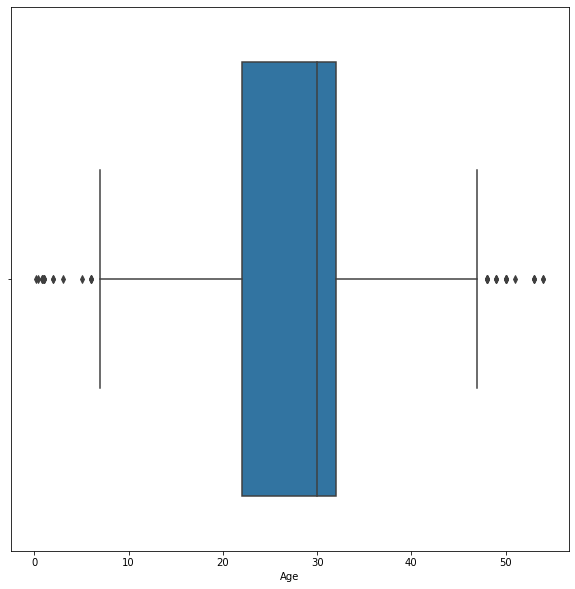

In [262]:
sns.boxplot('Age',data=test)

In [261]:
Q1 = np.percentile(test['Age'],25,interpolation='midpoint')
Q3 = np.percentile(test['Age'],75, interpolation='midpoint')
IQR = Q3- Q1

upper = np.where(test['Age'] >= (Q3 + 1.5 * IQR))
lower = np.where(test['Age'] >= (Q1 - 1.5 * IQR))
print(upper)
print(lower)
#test.drop(upper[0],axis=1,inplace=True)
#test.drop(lower[0],axis=1,inplace=True)

(array([  1,  12,  21,  22,  27,  63,  75, 122, 155, 166, 189, 203, 209,
       223, 276, 309, 331, 333, 349, 351, 366, 368, 372, 382], dtype=int64),)
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,
        79,  80,  81,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155,

KeyError: '[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27\n 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51\n 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 75 76\n 77 78 79 80 81 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101\n 102 103 104 105 106 107 109 110 111 112 113 114 115 116 117 118 119 120\n 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138\n 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156\n 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174\n 175 176 177 178 179 180 181 182 184 185 186 187 189 190 191 192 193 194\n 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212\n 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230\n 231 232 234 235 236 237 238 239 240 241 242 243 244 245 247 248 249 250\n 251 252 253 254 255 256 257 258 259 260 261 262 263 265 266 268 269 270\n 271 272 273 274 275 276 277 278 280 281 282 283 284 285 286 287 288 290\n 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308\n 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326\n 327 328 329 330 331 333 334 335 336 337 338 339 340 341 342 343 344 345\n 346 347 348 349 350 351 352 353 354 356 357 358 359 360 361 362 363 365\n 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383\n 385 386 387 388 389 390 391 392] not found in axis'

In [307]:
test.head()
#test.drop(['Name','Ticket','Cabin'],axis=1, inplace=True)

#preds_test= model.predict(test)

#test['Sex']=test['Sex'].replace({'male':1,'female':0})
#test[['C','Q','S']]=pd.get_dummies(test['Embarked'])
#test.drop('Embarked',axis=1,inplace=True)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,892,3,1,34.5,0,0,7.8292,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,0,1
3,895,3,1,27.0,0,0,8.6625,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,0,1
5,897,3,1,14.0,0,0,9.2250,0,0,1


In [321]:
test.shape

(393, 10)

In [330]:
preds_test= model.predict(test)
output= pd.DataFrame({'PassengerID':test['PassengerId'],'Survived':preds_test})
output.to_csv(r"D:\Machine_learning_Projects\Titanic\titanic\Submission_2.csv")

In [320]:
output.head()

,PassengerID,Survived
0,892,0
1,893,0
3,895,0
4,896,0
5,897,0


<AxesSubplot:xlabel='Age', ylabel='Cabin'>

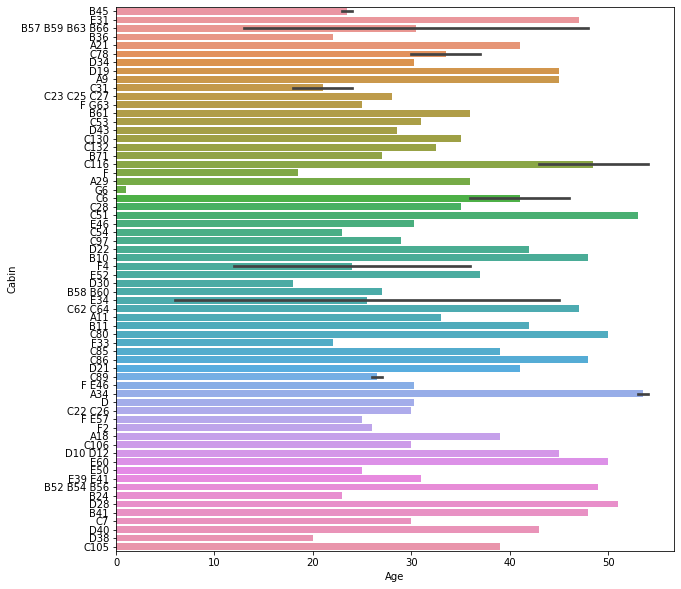

In [270]:
test.drop(test['Cabin'])